<a href="https://colab.research.google.com/github/woraphonp-038-5/dataviz2025/blob/main/Project_DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import os

# **Stop And Search**

In [60]:
folder_paths = [
    '/content/drive/MyDrive/Python&DataViz2025/data/2025-01',
    '/content/drive/MyDrive/Python&DataViz2025/data/2025-02',
    '/content/drive/MyDrive/Python&DataViz2025/data/2025-03',
    '/content/drive/MyDrive/Python&DataViz2025/data/2025-04',
    '/content/drive/MyDrive/Python&DataViz2025/data/2025-05'
]

stopandsearch_files = []

# Loop through each folder path
for folder_path in folder_paths:
    # Loop through all files in the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if '-stop-and-search' in file and file.endswith(".csv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)

                # ดึงชื่อเมืองจากชื่อไฟล์
                city_name = file.replace('-stop-and-search.csv', ''
                ).replace('2025-01-', ''
                ).replace('2025-02-', ''
                ).replace('2025-03-', ''
                ).replace('2025-04-', ''
                ).replace('2025-05-', '')

                df['Police Force'] = city_name

                stopandsearch_files.append(df)

In [61]:
# รวมทุก DataFrame
if stopandsearch_files:
    combined_stopandsearch_files_df = pd.concat(stopandsearch_files, ignore_index=True)

    # แปลงคอลัมน์ Date เป็น datetime และเพิ่มวันในสัปดาห์
    combined_stopandsearch_files_df['Date'] = pd.to_datetime(combined_stopandsearch_files_df['Date'])
    combined_stopandsearch_files_df['Day_of_Week'] = combined_stopandsearch_files_df['Date'].dt.day_name()

    # ทำให้ตัวอักษรตัวแรกเป็นตัวพิมพ์ใหญ่ และลบเครื่องหมายขีดกลาง (hyphen) ออกจากคอลัมน์ Police Force
    combined_stopandsearch_files_df['Police Force'] = combined_stopandsearch_files_df['Police Force'
    ].str.replace('-', ' ').str.title().str.replace('-', '')

    # สร้าง dictionary สำหรับแม็ปชื่อหน่วยงานตำรวจ กับ เมืองหลัก
    force_to_city = {
        "Avon And Somerset": "Bristol",
        "Bedfordshire": "Luton",
        "Btp": "London",
        "Cambridgeshire": "Cambridge",
        "Cheshire": "Chester",
        "City Of London": "London",
        "Cleveland": "Middlesbrough",
        "Cumbria": "Carlisle",
        "Derbyshire": "Derby",
        "Devon And Cornwall": "Exeter",
        "Dorset": "Bournemouth",
        "Durham": "Durham",
        "Dyfed Powys": "Carmarthen",
        "Essex": "Chelmsford",
        "Gloucestershire": "Gloucester",
        "Hampshire": "Winchester",
        "Hertfordshire": "St Albans",
        "Kent": "Maidstone",
        "Lancashire": "Preston",
        "Leicestershire": "Leicester",
        "Merseyside": "Liverpool",
        "Metropolitan": "London",
        "Norfolk": "Norwich",
        "North Wales": "Wrexham",
        "Northamptonshire": "Northampton",
        "Northumbria": "Newcastle upon Tyne",
        "Nottinghamshire": "Nottingham",
        "South Wales": "Cardiff",
        "South Yorkshire": "Sheffield",
        "Staffordshire": "Stoke-on-Trent",
        "Suffolk": "Ipswich",
        "Surrey": "Guildford",
        "Sussex": "Brighton",
        "Thames Valley": "Oxford",
        "Warwickshire": "Warwick",
        "West Mercia": "Worcester",
        "West Midlands": "Birmingham",
        "West Yorkshire": "Leeds"
    }

    # เพิ่มคอลัมน์ Main_City ลงใน DataFrame
    combined_stopandsearch_files_df["City"] = combined_stopandsearch_files_df["Police Force"].map(force_to_city)

    print(f"Read {len(stopandsearch_files)} files.")
    print(f"Combined DataFrame has {combined_stopandsearch_files_df.shape[0]} rows and {combined_stopandsearch_files_df.shape[1]} columns.")
else:
    print("Error")

Read 186 files.
Combined DataFrame has 155071 rows and 25 columns.


In [62]:
combined_stopandsearch_files_df.dropna(subset=['Date','Latitude','Longitude'], inplace=True)

In [63]:
combined_stopandsearch_files_df = combined_stopandsearch_files_df.fillna('Unknown').drop(
    columns=[
        'Unnamed: 0',
        'client_id',
        'cheese',
        'beer',
        'chicken',
        'bread',
        'coffee',
        'Policing operation',
        'Removal of more than just outer clothing',
        'Part of a policing operation'])

In [64]:
combined_stopandsearch_files_df.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Police Force,Day_of_Week,City
0,Person search,2025-01-02 00:17:00+00:00,53.296163,-4.621259,Female,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,North Wales,Thursday,Wrexham
1,Person search,2025-01-02 02:15:00+00:00,53.303482,-4.629408,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,North Wales,Thursday,Wrexham
2,Person search,2025-01-02 02:35:00+00:00,53.306185,-4.630805,Female,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,False,North Wales,Thursday,Wrexham
3,Person search,2025-01-02 02:38:00+00:00,53.303084,-4.631170,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,North Wales,Thursday,Wrexham
4,Person search,2025-01-02 02:52:00+00:00,53.046161,-2.993548,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,True,North Wales,Thursday,Wrexham


In [65]:
combined_stopandsearch_files_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135576 entries, 0 to 155070
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype              
---  ------                              --------------   -----              
 0   Type                                135576 non-null  object             
 1   Date                                135576 non-null  datetime64[ns, UTC]
 2   Latitude                            135576 non-null  float64            
 3   Longitude                           135576 non-null  float64            
 4   Gender                              135576 non-null  object             
 5   Age range                           135576 non-null  object             
 6   Self-defined ethnicity              135576 non-null  object             
 7   Officer-defined ethnicity           135576 non-null  object             
 8   Legislation                         135576 non-null  object             
 9   Object of search               

## Data Visualization Stop And Search

In [66]:
counts = combined_stopandsearch_files_df.groupby('Date').size().reset_index(name='Count')
display(counts)

,Date,Count
0,2025-01-01 00:00:00+00:00,26
1,2025-01-01 00:01:00+00:00,10
2,2025-01-01 00:02:00+00:00,5
3,2025-01-01 00:04:09+00:00,1
4,2025-01-01 00:05:00+00:00,1
...,...,...
79226,2025-05-31 23:46:26+00:00,1
79227,2025-05-31 23:47:36+00:00,1
79228,2025-05-31 23:48:03+00:00,1
79229,2025-05-31 23:49:08+00:00,1


In [67]:
# Create a monthly_counts DataFrame from the counts DataFrame
counts['Month'] = counts['Date'].dt.strftime('%B')
monthly_counts = counts.groupby('Month').size().reindex(['January', 'February', 'March', 'April', 'May'], fill_value=0).reset_index(name='Count')
display(monthly_counts)

,Month,Count
0,January,17492
1,February,17149
2,March,14262
3,April,13359
4,May,16969


In [68]:
import plotly.express as px
# 1. กำหนดพจนานุกรมของสีที่คุณต้องการ สำหรับ 5 เดือนเท่านั้น
# รูปแบบ: {'ชื่อเดือน': 'รหัสสี HEX หรือชื่อสีภาษาอังกฤษ'}
custom_color_map = {
    'January': '#1f77b4',   # น้ำเงิน
    'February': '#ff7f0e',  # ส้ม
    'March': '#2ca02c',     # เขียว
    'April': '#d62728',     # แดง
    'May': '#9467bd'        # ม่วง
}

# Add a month name column to the monthly_counts DataFrame
# *โค้ดเดิมของคุณ:* monthly_counts['Month'] = monthly_counts['Date'].dt.strftime('%B')

# Create a histogram of monthly counts
fig_monthly_histogram = px.bar(
    monthly_counts,
    x='Month',
    y='Count',
    title='จำนวนการตรวจค้นรายเดือน (Monthly Stop and Searches)',
    labels={'Month': 'เดือน', 'Count': 'จำนวนการตรวจค้น'},
    template='plotly_white',
    color='Month',
    # ------------------------------------------------------------------
    # ใช้ color_discrete_map ที่กำหนดไว้ 5 เดือน
    # ------------------------------------------------------------------
    color_discrete_map=custom_color_map
)

# Adjust bar width (optional, can be done via update_traces)
fig_monthly_histogram.update_traces(width=0.6)

# Show the histogram
fig_monthly_histogram.show()

In [69]:
# นับจำนวนเหตุการณ์ Stop and Search ในแต่ละเมือง
city_counts = combined_stopandsearch_files_df['City'].value_counts()

# แสดง 10 อันดับเมืองที่มีจำนวนน้อยที่สุด
print("\nBottom 10 Cities with the Least Stop and Search Incidents:")
display(city_counts.tail(5))


print("Top 5 Cities with the Most Stop and Search Incidents:")
display(city_counts.head(5))


Bottom 10 Cities with the Least Stop and Search Incidents:


,count
City,
Ipswich,1083
Cambridge,1022
Norwich,991
Gloucester,826
Bournemouth,607


Top 5 Cities with the Most Stop and Search Incidents:


,count
City,
London,20887
Liverpool,18183
Birmingham,11659
Maidstone,6982
Leeds,6695


/tmp/ipython-input-1040106034.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




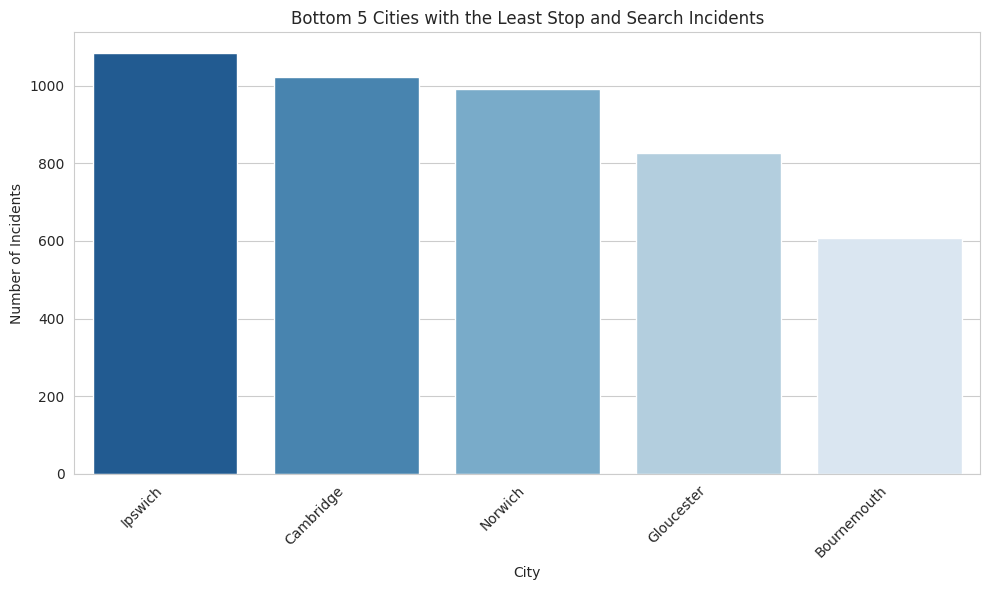

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the bottom 5 cities with the least stop and search incidents
bottom_5_cities = city_counts.tail(5)

# Create a bar plot with a red color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_cities.index, y=bottom_5_cities.values, palette='Blues_r') # Using a blue palette for least incidents
plt.title('Bottom 5 Cities with the Least Stop and Search Incidents')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

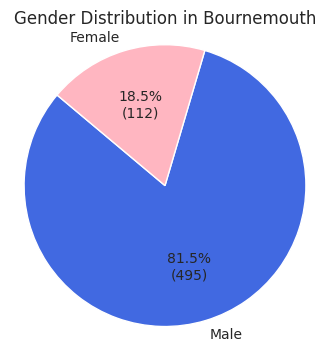

In [71]:
import matplotlib.pyplot as plt

# Filter data for Bournemouth
bournemouth_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['City'] == 'Bournemouth'].copy()

# Count gender distribution for Bournemouth
gender_counts_bournemouth = bournemouth_data['Gender'].value_counts()

# Calculate the total number of individuals
total_individuals = gender_counts_bournemouth.sum()

# Define colors for the pie chart (you can change these)
colors = ['royalblue', 'lightpink', 'gray'] # Added a color for 'Unknown' or other genders

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts_bournemouth, labels=gender_counts_bournemouth.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * total_individuals / 100), startangle=140, colors=colors)
plt.title('Gender Distribution in Bournemouth')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

หากต้องการหลีกเลี่ยงการโดนตรวจค้นควรเลือกเมือง bournemouth เพราะ มีการตรวจค้นน้อยที่สุดโดยเฉาะผู้หญิงที่มีเปอร์เซ็นการโดนตรวจเพียง 18.5 % จาก 607 คน

```
# มีการจัดรูปแบบเป็นโค้ด
```



/tmp/ipython-input-1723059617.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




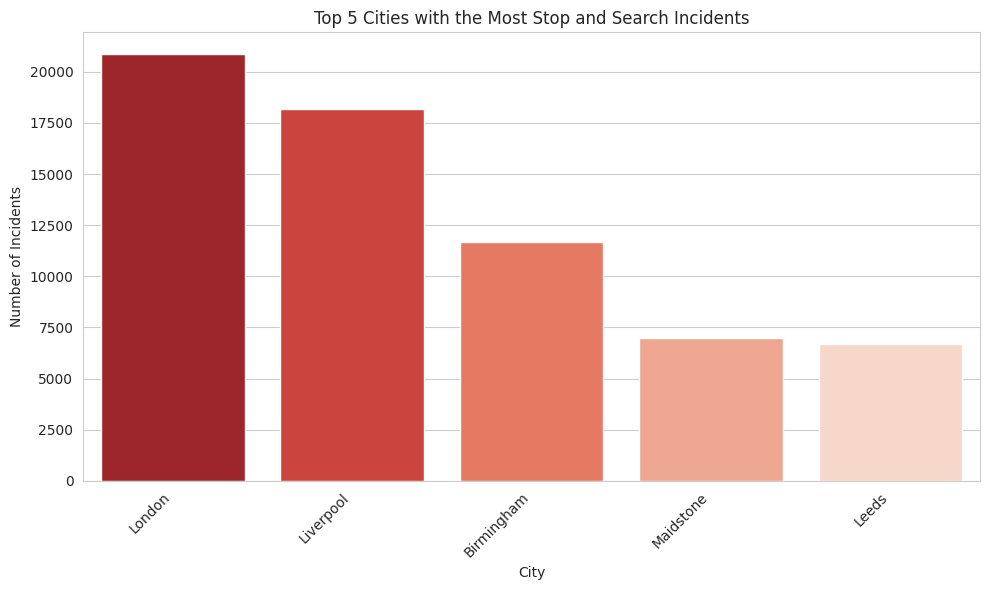

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 cities with the most stop and search incidents
top_5_cities = city_counts.head(5)

# Create a bar plot with a red color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette='Reds_r') # Changed palette to Reds_r for reversed (more intense) reds
plt.title('Top 5 Cities with the Most Stop and Search Incidents')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

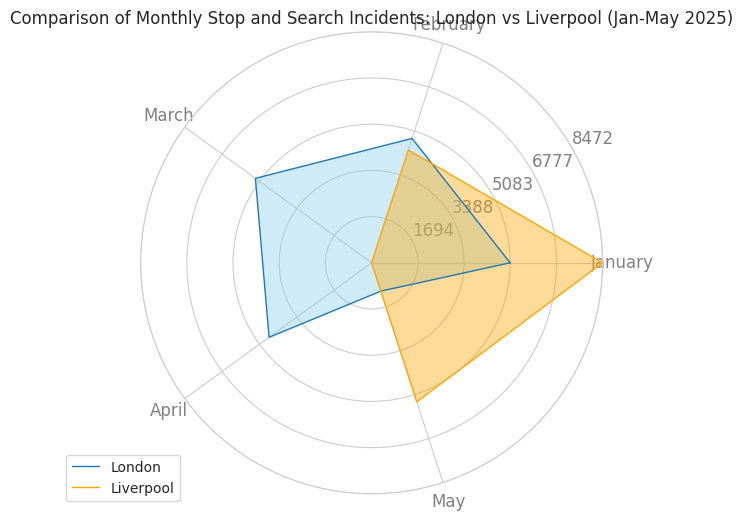

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Filter data for London and Liverpool
london_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['City'] == 'London'].copy()
liverpool_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['City'] == 'Liverpool'].copy()

# Extract month from Date and convert to string for grouping
london_data['Month'] = london_data['Date'].dt.strftime('%B')
liverpool_data['Month'] = liverpool_data['Date'].dt.strftime('%B')

# Group by month and count incidents
london_monthly_counts = london_data.groupby('Month').size().reindex(['January', 'February', 'March', 'April', 'May'], fill_value=0)
liverpool_monthly_counts = liverpool_data.groupby('Month').size().reindex(['January', 'February', 'March', 'April', 'May'], fill_value=0)


# Prepare data for radar chart
months = london_monthly_counts.index.tolist() # Months are the same for both cities
london_values = london_monthly_counts.values.tolist()
liverpool_values = liverpool_monthly_counts.values.tolist()

# Create angles for the radar chart
angles = [n / float(len(months)) * 2 * pi for n in range(len(months))]
angles += angles[:1] # Complete the circle

# Complete the data for the circle
london_values += london_values[:1]
liverpool_values += liverpool_values[:1]


# Create the radar chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], months, color='grey', size=12)

# Determine the maximum value for the y-axis limit (considering both cities)
max_val = max(max(london_values), max(liverpool_values))

plt.yticks(np.linspace(0, max_val, 6)[1:], [str(int(x)) for x in np.linspace(0, max_val, 6)[1:]],
           color='grey', size=12)


plt.ylim(0, max_val)
ax.set_rlabel_position(30)

# Plot London data
ax.plot(angles, london_values, linewidth=1,
        linestyle='solid', label='London')
ax.fill(angles, london_values, 'skyblue', alpha=0.4)

# Plot Liverpool data
ax.plot(angles, liverpool_values, linewidth=1,
        linestyle='solid', label='Liverpool', color='orange')
ax.fill(angles, liverpool_values, 'orange', alpha=0.4)


plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Comparison of Monthly Stop and Search Incidents: London vs Liverpool (Jan-May 2025)')
plt.show()

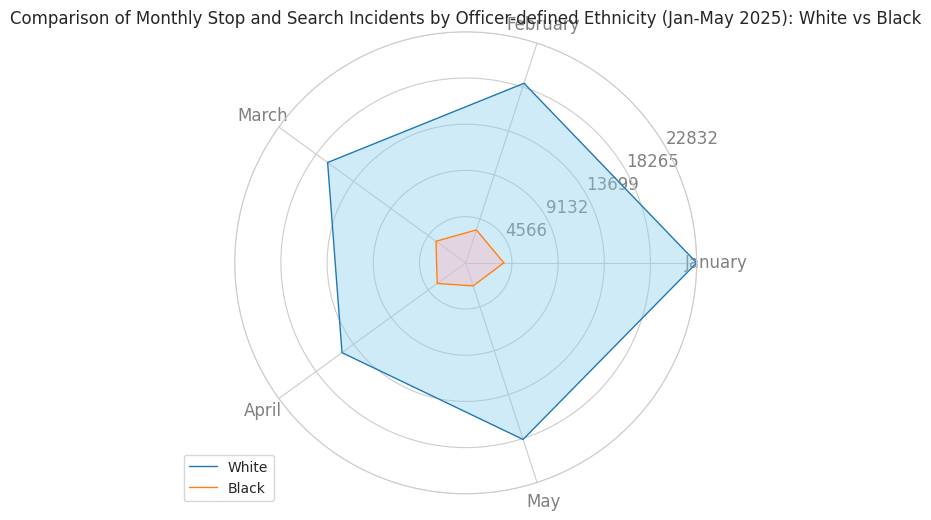

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Filter data for White and Black ethnicities (Officer-defined)
white_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Officer-defined ethnicity'] == 'White'].copy()
black_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Officer-defined ethnicity'] == 'Black'].copy()

# Extract month from Date and convert to string for grouping
white_data['Month'] = white_data['Date'].dt.strftime('%B')
black_data['Month'] = black_data['Date'].dt.strftime('%B')

# Group by month and count incidents
white_monthly_counts = white_data.groupby('Month').size().reindex(['January', 'February', 'March', 'April', 'May'], fill_value=0)
black_monthly_counts = black_data.groupby('Month').size().reindex(['January', 'February', 'March', 'April', 'May'], fill_value=0)


# Prepare data for radar chart
months = white_monthly_counts.index.tolist()
white_values = white_monthly_counts.values.tolist()
black_values = black_monthly_counts.values.tolist()

# Create angles for the radar chart
angles = [n / float(len(months)) * 2 * pi for n in range(len(months))]
angles += angles[:1] # Complete the circle

# Complete the data for the circle
white_values += white_values[:1]
black_values += black_values[:1]


# Create the radar chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], months, color='grey', size=12)

# Determine the maximum value for the y-axis limit
max_val = max(max(white_values), max(black_values))

plt.yticks(np.linspace(0, max_val, 6)[1:], [str(int(x)) for x in np.linspace(0, max_val, 6)[1:]],
           color='grey', size=12)


plt.ylim(0, max_val)
ax.set_rlabel_position(30)

# Plot White data
ax.plot(angles, white_values, linewidth=1,
        linestyle='solid', label='White')
ax.fill(angles, white_values, 'skyblue', alpha=0.4)

# Plot Black data
ax.plot(angles, black_values, linewidth=1,
        linestyle='solid', label='Black')
ax.fill(angles, black_values, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Comparison of Monthly Stop and Search Incidents by Officer-defined Ethnicity (Jan-May 2025): White vs Black')
plt.show()

In [75]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

# -----------------------------------------------------------
# 1. การทำความสะอาด/จัดเตรียมข้อมูล (สำหรับ Time Series และ Map)
# -----------------------------------------------------------

# ตรวจสอบและแปลงคอลัมน์ 'Date' เป็น datetime object
if 'Date' in df.columns:
    # ใช้ .str.split() เพื่อตัด timezone (+00:00) ออกก่อน หากมี
    df['Date'] = pd.to_datetime(df['Date'].astype(str).str.split('+', expand=True)[0], errors='coerce')
    # สร้างคอลัมน์สำหรับวันที่เท่านั้น เพื่อใช้ในการนับรายวัน
    df['Date_Only'] = df['Date'].dt.normalize()

# ---------------------------------------------------
# B. การกระจายตามภูมิศาสตร์ (Geographical Map)
# ---------------------------------------------------
# ต้องมั่นใจว่ามีคอลัมน์ 'Latitude' และ 'Longitude'
if all(col in df.columns for col in ['Latitude', 'Longitude', 'Type']):
    # ใช้การจัดกลุ่มข้อมูลเพื่อทำให้ Map ทำงานเร็วขึ้นและแสดงขนาดจุดตามความถี่
    map_data = df.groupby(['Latitude', 'Longitude', 'Type']).size().reset_index(name='Count')

    fig_map = px.scatter_mapbox(
        map_data,
        lat="Latitude",
        lon="Longitude",
        color="Type", # แยกสีระหว่าง Person search และ Vehicle search
        size="Count", # ขนาดจุดตามจำนวนการตรวจค้นที่พิกัดนั้นๆ
        zoom=10, # ปรับระดับซูมตามความเหมาะสม (อาจต้องปรับเอง)
        mapbox_style="carto-positron", # แนะนำ style นี้เพราะดูสะอาดตา
        title='แผนที่แสดงตำแหน่งการตรวจค้น (Geographical Location of Searches)',
        hover_data={'Latitude': False, 'Longitude': False, 'Count': True}
    )
    fig_map.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
    fig_map.show()
#


# ---------------------------------------------------
# C. การกระจายตามประเภท (Distribution Charts: Type, Day_of_Week)
# ---------------------------------------------------
if 'Type' in df.columns:
    fig_type = px.bar(
        df['Type'].value_counts().reset_index(name='Count'),
        x='Type',
        y='Count',
        title=' จำนวนการตรวจค้นตามประเภท (Searches by Type)',
        labels={'Type': 'ประเภทการตรวจค้น', 'Count': 'จำนวน'},
        color='Type',
        template='plotly_white'
    )
    fig_type.show()

if 'Day_of_Week' in df.columns:
    # กำหนดลำดับวันในสัปดาห์ให้ถูกต้องเพื่อการแสดงผลที่ดี
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    day_counts = df['Day_of_Week'].value_counts().reindex(day_order).fillna(0).reset_index(name='Count')

    fig_day = px.bar(
        day_counts,
        x='Day_of_Week',
        y='Count',
        title='4. จำนวนการตรวจค้นตามวันในสัปดาห์ (Searches by Day of Week)',
        labels={'Day_of_Week': 'วันในสัปดาห์', 'Count': 'จำนวน'},
        color='Day_of_Week',
        category_orders={'Day_of_Week': day_order},
        template='plotly_white'
    )
    fig_day.show()

In [76]:
compared_police_eth = combined_stopandsearch_files_df.groupby('Officer-defined ethnicity')['Type'].count().reset_index()
compared_police_eth

,Officer-defined ethnicity,Type
0,Asian,13091
1,Black,16692
2,Mixed,717
3,Other,3623
4,Unknown,9629
5,White,91824


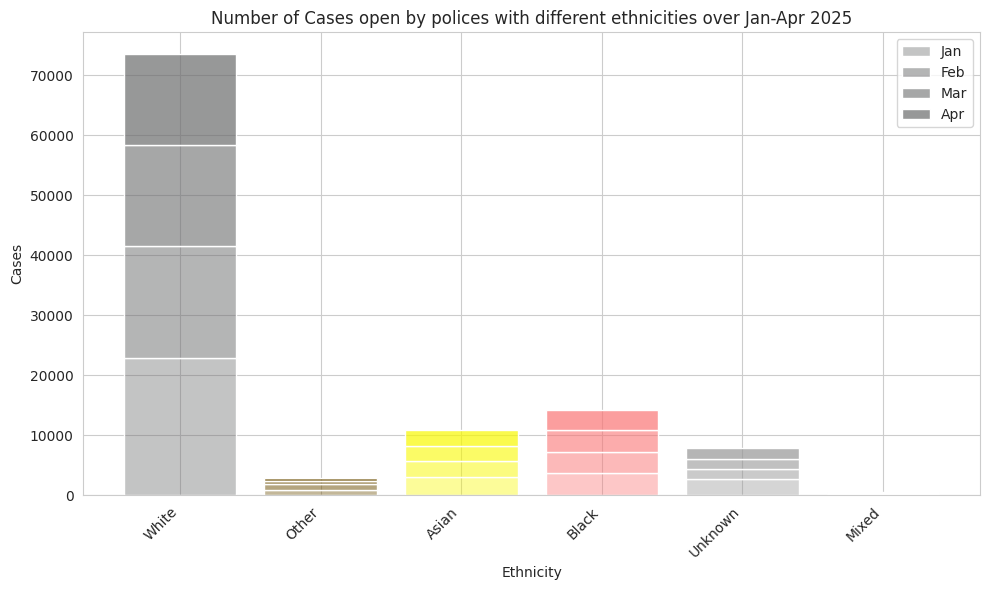

In [77]:
import matplotlib.pyplot as plt

# Filter data for each month and group by 'Officer-defined ethnicity'
jan_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Date'].dt.month == 1]
compared_police_eth1 = jan_data.groupby('Officer-defined ethnicity')['Type'].count().reset_index()

feb_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Date'].dt.month == 2]
compared_police_eth2 = feb_data.groupby('Officer-defined ethnicity')['Type'].count().reset_index()

mar_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Date'].dt.month == 3]
compared_police_eth3 = mar_data.groupby('Officer-defined ethnicity')['Type'].count().reset_index()

apr_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Date'].dt.month == 4]
compared_police_eth4 = apr_data.groupby('Officer-defined ethnicity')['Type'].count().reset_index()

# Merge the dataframes to ensure all ethnicities are present in each month's data
all_ethnicities = combined_stopandsearch_files_df['Officer-defined ethnicity'].unique()
ethnicities_df = pd.DataFrame({'Officer-defined ethnicity': all_ethnicities})

compared_police_eth1 = pd.merge(ethnicities_df, compared_police_eth1, on='Officer-defined ethnicity', how='left').fillna(0)
compared_police_eth2 = pd.merge(ethnicities_df, compared_police_eth2, on='Officer-defined ethnicity', how='left').fillna(0)
compared_police_eth3 = pd.merge(ethnicities_df, compared_police_eth3, on='Officer-defined ethnicity', how='left').fillna(0)
compared_police_eth4 = pd.merge(ethnicities_df, compared_police_eth4, on='Officer-defined ethnicity', how='left').fillna(0)


# Create the stacked bar chart
plt.figure(figsize=(10, 6)) # Adjust figure size if needed

plt.bar(compared_police_eth1['Officer-defined ethnicity'], compared_police_eth1['Type']
        , color=[[107/255,108/255,109/255,0.4], [107/255,77/255,0,0.4], [249/255,249/255,0,0.4], [250/255,117/255,117/255,0.4], [150/255,150/255,150/255,0.4], [200/255,200/255,200/255,0.4]] # Added colors for Mixed and Unknown
        , label='Jan')

plt.bar(compared_police_eth2['Officer-defined ethnicity'], compared_police_eth2['Type']
        , bottom = compared_police_eth1['Type']
        , color=[[107/255,108/255,109/255,0.5], [107/255,77/255,0,0.5], [249/255,249/255,0,0.5], [250/255,117/255,117/255,0.5], [150/255,150/255,150/255,0.5], [200/255,200/255,200/255,0.5]] # Added colors for Mixed and Unknown
        , label='Feb')

plt.bar(compared_police_eth3['Officer-defined ethnicity'], compared_police_eth3['Type']
        , bottom = compared_police_eth1['Type'] + compared_police_eth2['Type']
        , color=[[107/255,108/255,109/255,0.6], [107/255,77/255,0,0.6], [249/255,249/255,0,0.6], [250/255,117/255,117/255,0.6], [150/255,150/255,150/255,0.6], [200/255,200/255,200/255,0.6]] # Added colors for Mixed and Unknown
        , label='Mar')

plt.bar(compared_police_eth4['Officer-defined ethnicity'], compared_police_eth4['Type']
        , bottom = compared_police_eth1['Type'] + compared_police_eth2['Type']+ compared_police_eth3['Type']
        , color=[[107/255,108/255,109/255,0.7], [107/255,77/255,0,0.7], [249/255,249/255,0,0.7], [250/255,117/255,117/255,0.7], [150/255,150/255,150/255,0.7], [200/255,200/255,200/255,0.7]] # Added colors for Mixed and Unknown
        , label='Apr')

plt.xlabel('Ethnicity')
plt.ylabel('Cases')
plt.legend()
plt.title('Number of Cases open by polices with different ethnicities over Jan-Apr 2025')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [78]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display

# -----------------------------------------------------------
# 1. การคำนวณอัตราความสำเร็จ
# -----------------------------------------------------------

# ตรวจสอบว่าคอลัมน์ที่จำเป็นมีอยู่หรือไม่
required_column = 'Outcome linked to object of search'

if required_column in combined_stopandsearch_files_df.columns:

    # 1.1 นับจำนวนการตรวจค้นทั้งหมด
    total_searches = len(combined_stopandsearch_files_df)

    # 1.2 นับจำนวนครั้งที่ 'Outcome linked to object of search' เป็น True
    # การแปลงเป็น True/False ก่อนนับจะช่วยให้มั่นใจว่านับเฉพาะค่าที่เป็น True เท่านั้น
    successful_searches = combined_stopandsearch_files_df[combined_stopandsearch_files_df[required_column] == True].shape[0]

    # 1.3 คำนวณอัตราความสำเร็จเป็นเปอร์เซ็นต์
    if total_searches > 0:
        success_rate = (successful_searches / total_searches) * 100
        success_rate_rounded = round(success_rate, 2)

        print(f"✅ จำนวนการตรวจค้นทั้งหมด: {total_searches}")
        print(f"✅ จำนวนการตรวจค้นที่สำเร็จ (Outcome Linked): {successful_searches}")
        print(f"✅ อัตราความสำเร็จ: {success_rate_rounded}%")

        # -----------------------------------------------------------
        # 2. การสร้าง Gauge Chart (มาตรวัด)
        # -----------------------------------------------------------

        fig_gauge = go.Figure(go.Indicator(
            mode = "gauge+number",
            value = success_rate_rounded,
            title = {'text': "<b>อัตราความสำเร็จของการตรวจค้น</b><br><span style='font-size:0.8em;color:gray'>(Outcome Linked to Object of Search = True)</span>"},
            domain = {'x': [0, 1], 'y': [0, 1]},
            gauge = {
                'shape': "angular",
                'axis': {'range': [0, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
                'bar': {'color': "darkblue"},
                'steps': [
                    # กำหนดสีตามระดับความสำเร็จ
                    {'range': [0, 25], 'color': "red"},       # ต่ำกว่า 25% (ต่ำมาก)
                    {'range': [25, 50], 'color': "orange"},    # 25% - 50% (ปานกลาง/ต้องปรับปรุง)
                    {'range': [50, 75], 'color': "lightgreen"},# 50% - 75% (ดี)
                    {'range': [75, 100], 'color': "green"}   # 75% ขึ้นไป (ยอดเยี่ยม)
                ],
                'threshold': {
                    'line': {'color': "black", 'width': 4},
                    'thickness': 0.75,
                    'value': success_rate_rounded # ชี้ไปยังค่าที่คำนวณได้
                }
            }
        ))

        fig_gauge.update_layout(title_x=0.5, margin=dict(l=20, r=20, t=50, b=20))
        fig_gauge.show()
        #

    else:
        print("💡 ข้อมูลไม่มีแถว (Total Searches = 0) จึงไม่สามารถคำนวณอัตราความสำเร็จได้")

else:
    print(f"❌ ERROR: ไม่พบคอลัมน์ '{required_column}' ใน DataFrame โปรดตรวจสอบชื่อคอลัมน์")

✅ จำนวนการตรวจค้นทั้งหมด: 135576
✅ จำนวนการตรวจค้นที่สำเร็จ (Outcome Linked): 35011
✅ อัตราความสำเร็จ: 25.82%


In [79]:
import pandas as pd
import plotly.express as px

# -----------------------------------------------------------
# 1. การเตรียมข้อมูล
# -----------------------------------------------------------
# นับจำนวนแต่ละประเภทของ 'Outcome'
outcome_counts = df['Outcome'].value_counts().reset_index()
outcome_counts.columns = ['Outcome', 'Count']

# -----------------------------------------------------------
# 2. การสร้าง Donut Chart
# -----------------------------------------------------------
fig_donut = px.pie(
    outcome_counts,
    values='Count',
    names='Outcome',
    title='1. การกระจายของผลลัพธ์การตรวจค้น (Outcome Distribution)',
    hole=.4,  # กำหนดขนาดรูตรงกลางเพื่อสร้าง Donut Chart
    template='plotly_white',
    # ใช้ชุดสีที่อ่านง่าย
    color_discrete_sequence=px.colors.qualitative.Bold
)

# ปรับรูปแบบข้อความบนกราฟ
fig_donut.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

fig_donut.show()

In [80]:
import pandas as pd
import plotly.express as px

# -----------------------------------------------------------
# 1. การเตรียมข้อมูล
# -----------------------------------------------------------
# นับจำนวนแต่ละประเภทของ 'Outcome'
outcome_counts = combined_stopandsearch_files_df['Outcome'].value_counts().reset_index()
outcome_counts.columns = ['Outcome', 'Count']

# Filter out the 'Unknown' outcome
filtered_outcome_counts = outcome_counts[outcome_counts['Outcome'] != 'Unknown']

# Get the top 3 outcomes from the filtered data
top_3_outcomes = filtered_outcome_counts.head(3)

# -----------------------------------------------------------
# 2. การสร้าง Donut Chart
# -----------------------------------------------------------
fig_donut = px.pie(
    top_3_outcomes, # Use the top 3 filtered data
    values='Count',
    names='Outcome',
    title='1. การกระจายของผลลัพธ์การตรวจค้น (Outcome Distribution) - Top 3 (Excl. Unknown)',
    hole=.4,  # กำหนดขนาดรูตรงกลางเพื่อสร้าง Donut Chart
    template='plotly_white',
    # ใช้ชุดสีที่อ่านง่าย
    color_discrete_sequence=px.colors.qualitative.Bold
)

# ปรับรูปแบบข้อความบนกราฟ
fig_donut.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

fig_donut.show()

# Street

In [81]:
folder_paths = [
    '/content/drive/MyDrive/Python&DataViz2025/data/2025-01',
    '/content/drive/MyDrive/Python&DataViz2025/data/2025-02',
    '/content/drive/MyDrive/Python&DataViz2025/data/2025-03',
    '/content/drive/MyDrive/Python&DataViz2025/data/2025-04',
    '/content/drive/MyDrive/Python&DataViz2025/data/2025-05'
]

street_files = []
for folder_path in folder_paths: # Iterate through the list of folder paths
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if '-street' in file and file.endswith(".csv"): # Filter for '-street' in filename and assume CSVs
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                street_files.append(df)

In [82]:
# Concatenate all DataFrames into a single DataFrame if needed
if street_files: # Check if the list of files is not empty
    combined_street_df = pd.concat(street_files, ignore_index=True)
    display(combined_street_df.head())
else:
    print("No files containing '-street' were found in the specified folders.")

print(f"Read {len(street_files)} files containing '-street' from {folder_paths}")

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,86893c28116d160a744ca3e92f15df3bb3942c40c7e71d...,2025-01,Northamptonshire Police,Northamptonshire Police,-1.007613,53.381715,On or near Birch Close,E01028034,Bassetlaw 003B,Violence and sexual offences,Under investigation,NaN
1,ca9bbed3afee95bdc7194a5dcc82afcc8f6e05d68a0465...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.457135,52.166080,On or near Westrope Way,E01017458,Bedford 005F,Other crime,Action to be taken by another organisation,NaN
2,355bb98fbf7ff11315d3ae5be4b81a707d1a615cab582c...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.509321,52.129689,On or near Wayland Road,E01034415,Bedford 008G,Violence and sexual offences,Under investigation,NaN
3,11f445bcfe944d45a98da029294a5542f7fd12c8514def...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.487824,52.082822,On or near Borage Walk,E01017552,Bedford 020B,Violence and sexual offences,Unable to prosecute suspect,NaN
4,726220445bba99c35c33ec3596b52e15ac09640c988753...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.058063,52.970883,On or near Shopping Area,E01034683,Boston 009E,Violence and sexual offences,Awaiting court outcome,NaN


Read 86 files containing '-street' from ['/content/drive/MyDrive/Python&DataViz2025/data/2025-01', '/content/drive/MyDrive/Python&DataViz2025/data/2025-02', '/content/drive/MyDrive/Python&DataViz2025/data/2025-03', '/content/drive/MyDrive/Python&DataViz2025/data/2025-04', '/content/drive/MyDrive/Python&DataViz2025/data/2025-05']


In [83]:
combined_street_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684676 entries, 0 to 684675
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               584485 non-null  object 
 1   Month                  684676 non-null  object 
 2   Reported by            684676 non-null  object 
 3   Falls within           684676 non-null  object 
 4   Longitude              673045 non-null  float64
 5   Latitude               673045 non-null  float64
 6   Location               684676 non-null  object 
 7   LSOA code              672940 non-null  object 
 8   LSOA name              672940 non-null  object 
 9   Crime type             684676 non-null  object 
 10  Last outcome category  584485 non-null  object 
 11  Context                0 non-null       float64
dtypes: float64(3), object(9)
memory usage: 62.7+ MB


In [84]:
combined_street_df.isnull().any()

,0
Crime ID,True
Month,False
Reported by,False
Falls within,False
Longitude,True
Latitude,True
Location,False
LSOA code,True
LSOA name,True
Crime type,False


In [85]:
# Drop rows with missing values in specified columns
combined_street_df = combined_street_df.dropna(subset=['Crime ID', 'Longitude', 'Latitude', 'LSOA code', 'LSOA name'])

# Fill missing values in specified columns with 'UNKNOWN'
combined_street_df['Last outcome category'] = combined_street_df['Last outcome category'].fillna('UNKNOWN')
combined_street_df['Context'] = combined_street_df['Context'].fillna('UNKNOWN')

#Drop duplicates
combined_street_df = combined_street_df.drop_duplicates()
display(combined_street_df.isnull().sum())

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,0
LSOA name,0
Crime type,0


In [86]:
combined_street_df['Crime type'].unique()

array(['Violence and sexual offences', 'Other crime', 'Other theft',
       'Drugs', 'Public order', 'Criminal damage and arson', 'Burglary',
       'Vehicle crime', 'Bicycle theft', 'Possession of weapons',
       'Shoplifting', 'Robbery', 'Theft from the person'], dtype=object)

In [87]:
combined_street_df['Reported by'].unique()

array(['Northamptonshire Police', 'Warwickshire Police',
       'West Mercia Police', 'South Wales Police', 'Wiltshire Police',
       'Sussex Police', 'Suffolk Constabulary', 'North Wales Police',
       'South Yorkshire Police', 'Thames Valley Police',
       'North Yorkshire Police', 'Lincolnshire Police', 'Surrey Police',
       'Cambridgeshire Constabulary', 'Cheshire Constabulary',
       'Durham Constabulary', 'Avon and Somerset Constabulary',
       'Nottinghamshire Police', 'Gwent Police', 'Merseyside Police',
       'Hampshire Constabulary', 'Cumbria Constabulary',
       'West Midlands Police', 'Derbyshire Constabulary',
       'City of London Police', 'Essex Police', 'Dorset Police',
       'Staffordshire Police', 'Devon & Cornwall Police',
       'Dyfed-Powys Police', 'Kent Police', 'Northumbria Police',
       'Bedfordshire Police', 'Lancashire Constabulary',
       'Norfolk Constabulary', 'Humberside Police', 'Cleveland Police',
       'West Yorkshire Police', 'Glouceste

In [88]:
combined_street_df['Reported by'].unique()

array(['Northamptonshire Police', 'Warwickshire Police',
       'West Mercia Police', 'South Wales Police', 'Wiltshire Police',
       'Sussex Police', 'Suffolk Constabulary', 'North Wales Police',
       'South Yorkshire Police', 'Thames Valley Police',
       'North Yorkshire Police', 'Lincolnshire Police', 'Surrey Police',
       'Cambridgeshire Constabulary', 'Cheshire Constabulary',
       'Durham Constabulary', 'Avon and Somerset Constabulary',
       'Nottinghamshire Police', 'Gwent Police', 'Merseyside Police',
       'Hampshire Constabulary', 'Cumbria Constabulary',
       'West Midlands Police', 'Derbyshire Constabulary',
       'City of London Police', 'Essex Police', 'Dorset Police',
       'Staffordshire Police', 'Devon & Cornwall Police',
       'Dyfed-Powys Police', 'Kent Police', 'Northumbria Police',
       'Bedfordshire Police', 'Lancashire Constabulary',
       'Norfolk Constabulary', 'Humberside Police', 'Cleveland Police',
       'West Yorkshire Police', 'Glouceste

In [89]:
combined_street_df['City'] = combined_street_df['Reported by'].str.replace(' Constabulary', '').str.replace(' Police', '')
display(combined_street_df.head())

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,City
0,86893c28116d160a744ca3e92f15df3bb3942c40c7e71d...,2025-01,Northamptonshire Police,Northamptonshire Police,-1.007613,53.381715,On or near Birch Close,E01028034,Bassetlaw 003B,Violence and sexual offences,Under investigation,UNKNOWN,Northamptonshire
1,ca9bbed3afee95bdc7194a5dcc82afcc8f6e05d68a0465...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.457135,52.166080,On or near Westrope Way,E01017458,Bedford 005F,Other crime,Action to be taken by another organisation,UNKNOWN,Northamptonshire
2,355bb98fbf7ff11315d3ae5be4b81a707d1a615cab582c...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.509321,52.129689,On or near Wayland Road,E01034415,Bedford 008G,Violence and sexual offences,Under investigation,UNKNOWN,Northamptonshire
3,11f445bcfe944d45a98da029294a5542f7fd12c8514def...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.487824,52.082822,On or near Borage Walk,E01017552,Bedford 020B,Violence and sexual offences,Unable to prosecute suspect,UNKNOWN,Northamptonshire
4,726220445bba99c35c33ec3596b52e15ac09640c988753...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.058063,52.970883,On or near Shopping Area,E01034683,Boston 009E,Violence and sexual offences,Awaiting court outcome,UNKNOWN,Northamptonshire


In [90]:
combined_street_df['City'].unique()

array(['Northamptonshire', 'Warwickshire', 'West Mercia', 'South Wales',
       'Wiltshire', 'Sussex', 'Suffolk', 'North Wales', 'South Yorkshire',
       'Thames Valley', 'North Yorkshire', 'Lincolnshire', 'Surrey',
       'Cambridgeshire', 'Cheshire', 'Durham', 'Avon and Somerset',
       'Nottinghamshire', 'Gwent', 'Merseyside', 'Hampshire', 'Cumbria',
       'West Midlands', 'Derbyshire', 'City of London', 'Essex', 'Dorset',
       'Staffordshire', 'Devon & Cornwall', 'Dyfed-Powys', 'Kent',
       'Northumbria', 'Bedfordshire', 'Lancashire', 'Norfolk',
       'Humberside', 'Cleveland', 'West Yorkshire', 'Gloucestershire',
       'Hertfordshire', 'Leicestershire', 'Metropolitan Service'],
      dtype=object)

In [91]:
combined_street_df['Month_num'] = pd.to_datetime(combined_street_df['Month']).dt.month
display(combined_street_df.head())

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,City,Month_num
0,86893c28116d160a744ca3e92f15df3bb3942c40c7e71d...,2025-01,Northamptonshire Police,Northamptonshire Police,-1.007613,53.381715,On or near Birch Close,E01028034,Bassetlaw 003B,Violence and sexual offences,Under investigation,UNKNOWN,Northamptonshire,1
1,ca9bbed3afee95bdc7194a5dcc82afcc8f6e05d68a0465...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.457135,52.166080,On or near Westrope Way,E01017458,Bedford 005F,Other crime,Action to be taken by another organisation,UNKNOWN,Northamptonshire,1
2,355bb98fbf7ff11315d3ae5be4b81a707d1a615cab582c...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.509321,52.129689,On or near Wayland Road,E01034415,Bedford 008G,Violence and sexual offences,Under investigation,UNKNOWN,Northamptonshire,1
3,11f445bcfe944d45a98da029294a5542f7fd12c8514def...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.487824,52.082822,On or near Borage Walk,E01017552,Bedford 020B,Violence and sexual offences,Unable to prosecute suspect,UNKNOWN,Northamptonshire,1
4,726220445bba99c35c33ec3596b52e15ac09640c988753...,2025-01,Northamptonshire Police,Northamptonshire Police,-0.058063,52.970883,On or near Shopping Area,E01034683,Boston 009E,Violence and sexual offences,Awaiting court outcome,UNKNOWN,Northamptonshire,1


In [92]:
combined_street_df.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,0
LSOA name,0
Crime type,0


## Data Visualization Street

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

%matplotlib inline

sns.set_style("whitegrid")

In [94]:
# --- 1. Heatmap (Hotspot Map) ---

# เลือกเมืองที่ต้องการดู
# สามารถเปลี่ยน 'city_name' เป็นเมืองที่ต้องการได้
try:
    # ใช้ cleaned_street_df แทน all_street_df
    city_name_to_plot = combined_street_df['City'].mode()[0]
    print(f"กำลังสร้าง Heatmap สำหรับเมือง: {city_name_to_plot}")

    # กรองข้อมูลเฉพาะเมืองที่เลือก
    df_city = combined_street_df[combined_street_df['City'] == city_name_to_plot]

    # หาจุดศูนย์กลางของแผนที่
    # ตรวจสอบว่า df_city ไม่ว่างเปล่าก่อนคำนวณค่าเฉลี่ย
    if not df_city.empty:
        center_lat = df_city['Latitude'].mean()
        center_lon = df_city['Longitude'].mean()

        # สร้างแผนที่
        m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

        # เตรียมข้อมูลสำหรับ Heatmap (list of [lat, lon])
        # ตรวจสอบว่ามีข้อมูล Latitude และ Longitude ก่อนสร้าง HeatMap
        if not df_city[['Latitude', 'Longitude']].isnull().any(axis=1).all():
            heat_data = df_city[['Latitude', 'Longitude']].dropna().values.tolist()
            # เพิ่ม Heatmap ลงในแผนที่
            HeatMap(heat_data).add_to(m)

            display(m)
        else:
            print("ไม่มีข้อมูล Latitude หรือ Longitude ที่ถูกต้องสำหรับ Heatmap ในเมืองนี้")
    else:
        print(f"ไม่พบข้อมูลสำหรับเมือง: {city_name_to_plot}")


except Exception as e:
    print(f"เกิดข้อผิดพลาดในการสร้างแผนที่: {e}")
    print("โปรดตรวจสอบว่าได้ติดตั้งไลบรารี folium และมีการเชื่อมต่ออินเทอร์เน็ต")

กำลังสร้าง Heatmap สำหรับเมือง: Metropolitan Service


ประโยชน์ : โจรสามารถซูมดูแผนที่นี้เพื่อดูว่าถนนเส้นไหน, ย่านไหน (สีแดง/ส้ม) ที่ตำรวจไปตรวจค้นบ่อยที่สุด

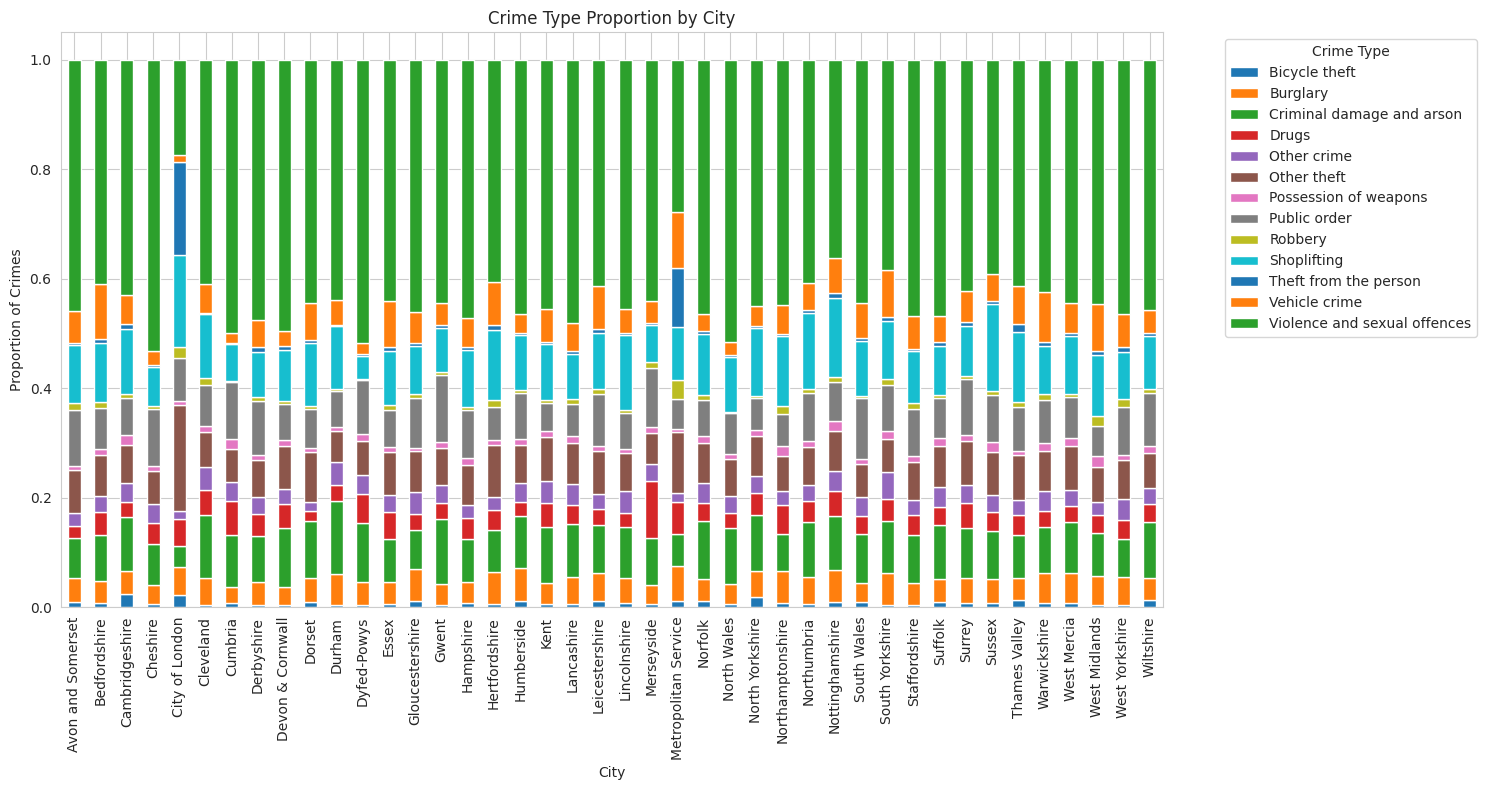

In [95]:
#  (Crime Type Proportion by City) ---

# Group data by City and Crime type and count occurrences
crime_by_city = combined_street_df.groupby(['City', 'Crime type']).size().unstack(fill_value=0)

# Calculate proportions
crime_by_city_proportion = crime_by_city.divide(crime_by_city.sum(axis=1), axis=0)

# Plotting the 100% stacked bar chart
crime_by_city_proportion.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Crime Type Proportion by City')
plt.xlabel('City')
plt.ylabel('Proportion of Crimes')
plt.xticks(rotation=90)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ทำให้เห็นภาพรวมขององค์ประกอบอาชญากรรมในแต่ละเมืองได้อย่างชัดเจน ว่าเมืองไหนมีสัดส่วนอาชญากรรมประเภทใดสูงหรือต่ำ เมื่อเทียบกับอาชญากรรมทั้งหมดในเมืองนั้นๆ

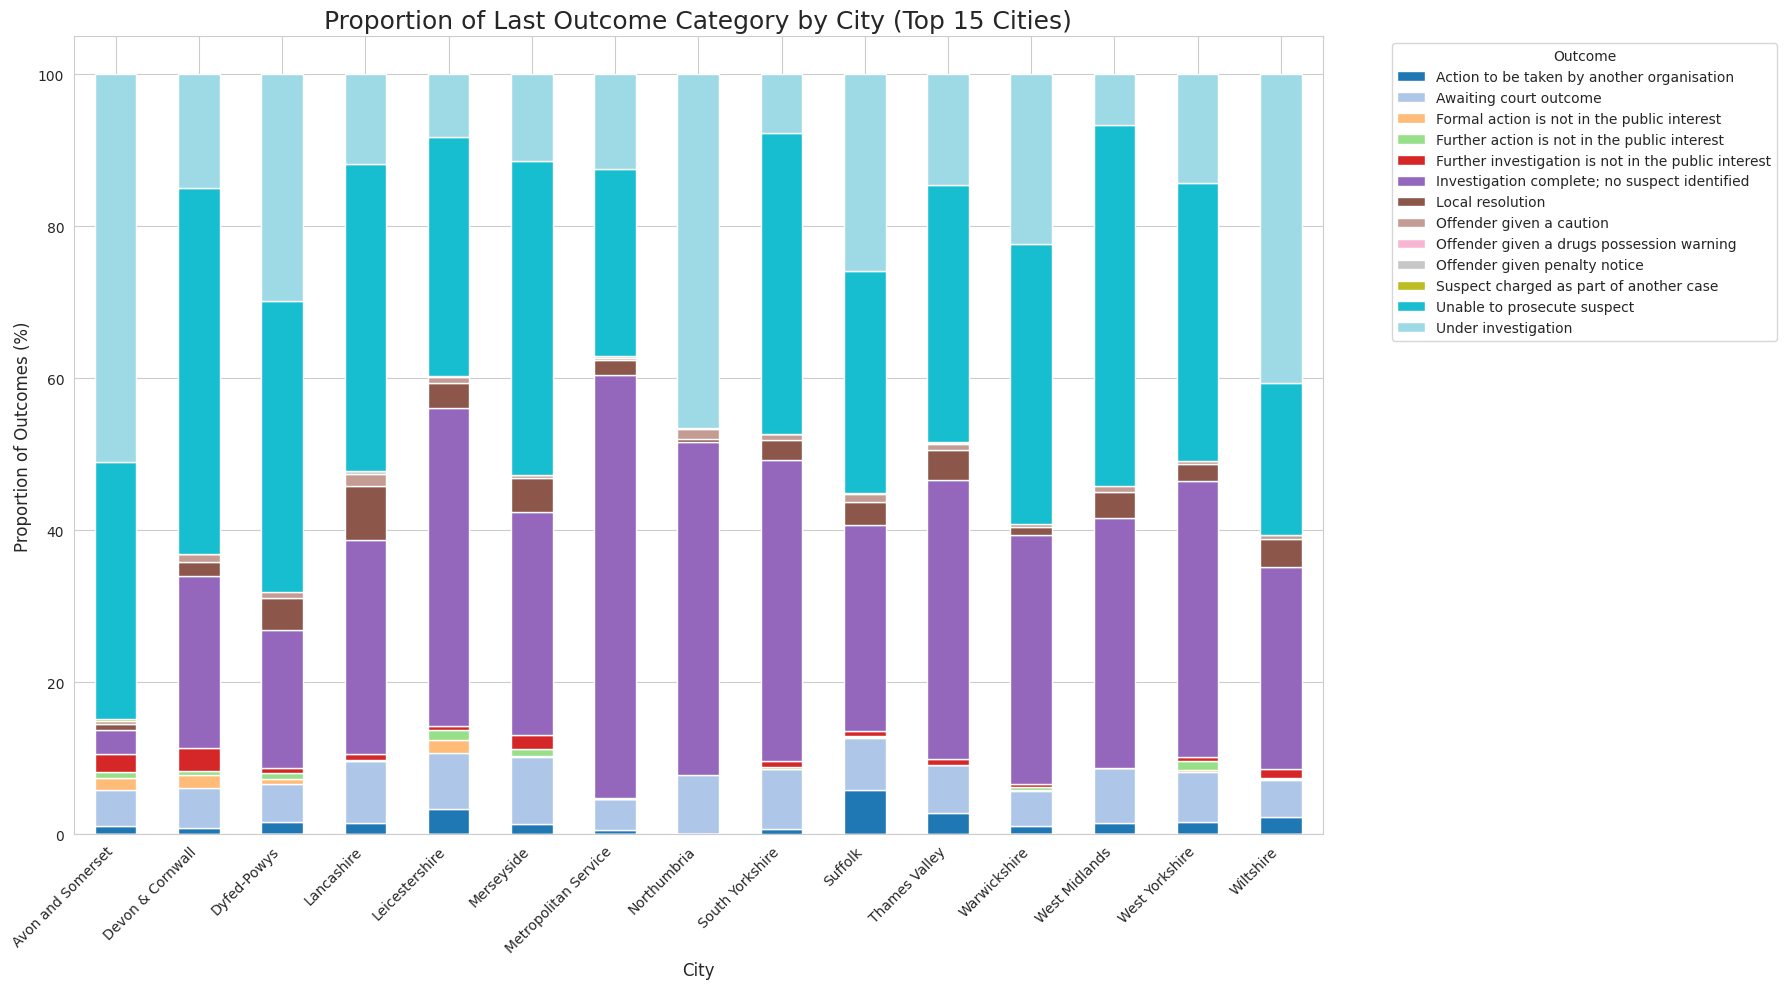

In [96]:
# --- 1. "Risk" Graph: Outcome Proportion by City ---

# ใช้ Top 15 เมืองเดิม
top_15_cities = combined_street_df['City'].value_counts().nlargest(15).index
df_top15 = combined_street_df[combined_street_df['City'].isin(top_15_cities)]

# 1. สร้างตาราง Crosstab
ct_outcome = pd.crosstab(df_top15['City'], df_top15['Last outcome category'])

# 2. กรองเฉพาะ Outcome ที่เราสนใจ
# (Outcome มีเยอะมาก เราจะเลือกเฉพาะที่ชัดเจน เช่น โดนจับ vs ไม่โดน)
key_outcomes = [
    'Investigation complete; no suspect identified', # รอด (หาตัวไม่เจอ)
    'Unable to prosecute suspect', # รอด (หลักฐานไม่พอ)
    'Formal action is not in the public interest', # รอด
    'Offender given a caution', # โดน (คาดโทษ)
    'Offender given community resolution', # โดน (ไกล่เกลี่ย)
    'Suspect charged', # โดนหนัก (ส่งฟ้อง)
    # คุณสามารถเพิ่ม/ลดได้ตามคอลัมน์ของคุณ
]
# กรองตารางให้เหลือเฉพาะ Outcome ที่น่าสนใจ (ถ้ามีเยอะเกินไป)
# key_outcomes_in_data = [col for col in key_outcomes if col in ct_outcome.columns]
# ct_outcome_filtered = ct_outcome[key_outcomes_in_data]

# ถ้า Outcome ไม่เยอะ ก็ใช้ทั้งหมดได้เลย
ct_outcome_filtered = ct_outcome


# 3. คำนวณสัดส่วน 100%
ct_outcome_percent = ct_outcome_filtered.apply(lambda r: r / r.sum() * 100, axis=1)

# 4. เรียงลำดับตาม Outcome ที่แย่ที่สุด (เช่น 'Suspect charged')
if 'Suspect charged' in ct_outcome_percent.columns:
    ct_outcome_percent = ct_outcome_percent.sort_values(by='Suspect charged', ascending=False)

# 5. พล็อตกราฟ
ct_outcome_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(18, 10),
    colormap='tab20' # Use the previous colormap
)

plt.title('Proportion of Last Outcome Category by City (Top 15 Cities)', fontsize=18)
plt.xlabel('City', fontsize=12)
plt.ylabel('Proportion of Outcomes (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

กราฟนี้บอกเราว่า ถ้าโดนค้นแล้ว เมืองไหน "เข้ม" (โอกาสโดนจับสูง) หรือ "ปล่อย" (โอกาสรอดสูง)

สีม่วง (Suspect charged - โดนส่งฟ้อง): นี่คือ outcome ที่แย่ที่สุด

เมืองที่เสี่ยงสูงสุด (สีม่วงหนา): Dyfed-Powys, Leicestershire, South Yorkshire, Suffolk สังเกตว่าแท่งสีม่วงของเมืองเหล่านี้ หนา กว่าเมืองอื่นอย่างชัดเจน แปลว่าถ้าโดนค้นที่นี่ ตำรวจเอาจริง โอกาสโดนส่งฟ้องสูงมาก

สีฟ้าคราม/ฟ้าอ่อน (Investigation complete... / Unable to prosecute... - รอด/หาหลักฐานไม่เจอ): นี่คือ outcome ที่ดีที่สุด (สำหรับโจร)

เมืองที่น่าสนใจ (สีฟ้า/คราม หนา): Merseyside, West Midlands, West Yorkshire เมืองเหล่านี้มีสัดส่วนสีม่วงที่ "บางกว่า" และมีสัดส่วนสีฟ้า/ครามที่ "หนากว่า" แปลว่ามีโอกาสที่ตำรวจจะปิดคดีไป (รอดตัว) สูงกว่า

In [97]:
# Define 'Signal Crimes' based on common crime types that are more likely to be reported and investigated
# You might need to adjust this list based on the specific context of your data and analysis goals.
signal_crimes = [
    'Violence and sexual offences',
    'Robbery',
    'Burglary',
    'Vehicle crime',
    'Theft from the person',
    'Shoplifting',
    'Bicycle theft',
    'Criminal damage and arson',
    'Drugs',
    'Possession of weapons'
]

# Filter the cleaned_street_df for 'Signal Crimes' and the top 15 cities
df_signal_top15 = combined_street_df[
    combined_street_df['Crime type'].isin(signal_crimes) &
    combined_street_df['City'].isin(top_15_cities)
]

display(df_signal_top15.head())

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,City,Month_num
5773,bb7036edb1d8bf1e3b42bdd57e253816be60bfda294491...,2025-01,Warwickshire Police,Warwickshire Police,-1.767380,52.559816,On or near Holly Lane,E01009450,Birmingham 012E,Burglary,Investigation complete; no suspect identified,UNKNOWN,Warwickshire,1
5775,10d604bd87a72f75c405672fc92d2b6ebc4f2aa14401d4...,2025-01,Warwickshire Police,Warwickshire Police,-1.793029,52.510294,On or near Langley Drive,E01009101,Birmingham 029D,Vehicle crime,Investigation complete; no suspect identified,UNKNOWN,Warwickshire,1
5776,db1a2cf75ccc10cfeeb0f6ce4cd83c8453e858bae1ae30...,2025-01,Warwickshire Police,Warwickshire Police,-1.868176,52.459904,On or near Conway Road,E01009371,Birmingham 077D,Violence and sexual offences,Unable to prosecute suspect,UNKNOWN,Warwickshire,1
5777,2ce109c7c2b48bbd496a025edd47b00719a77a129e5421...,2025-01,Warwickshire Police,Warwickshire Police,-1.830303,52.453608,On or near Petrol Station,E01008889,Birmingham 078D,Violence and sexual offences,Under investigation,UNKNOWN,Warwickshire,1
5778,899fba3f7452f917b6abfd62405008c9cc771351750d72...,2025-01,Warwickshire Police,Warwickshire Police,-1.143164,52.580958,On or near Westleigh Road,E01025658,Blaby 008D,Violence and sexual offences,Under investigation,UNKNOWN,Warwickshire,1


โค้ดนี้ใช้เพื่อเตรียมข้อมูลย่อยที่เราจะนำไปใช้สร้างกราฟหรือวิเคราะห์ต่อ โดยเน้นเฉพาะอาชญากรรมที่สำคัญและเกิดขึ้นในพื้นที่ที่มีความหนาแน่นของคดีสูง

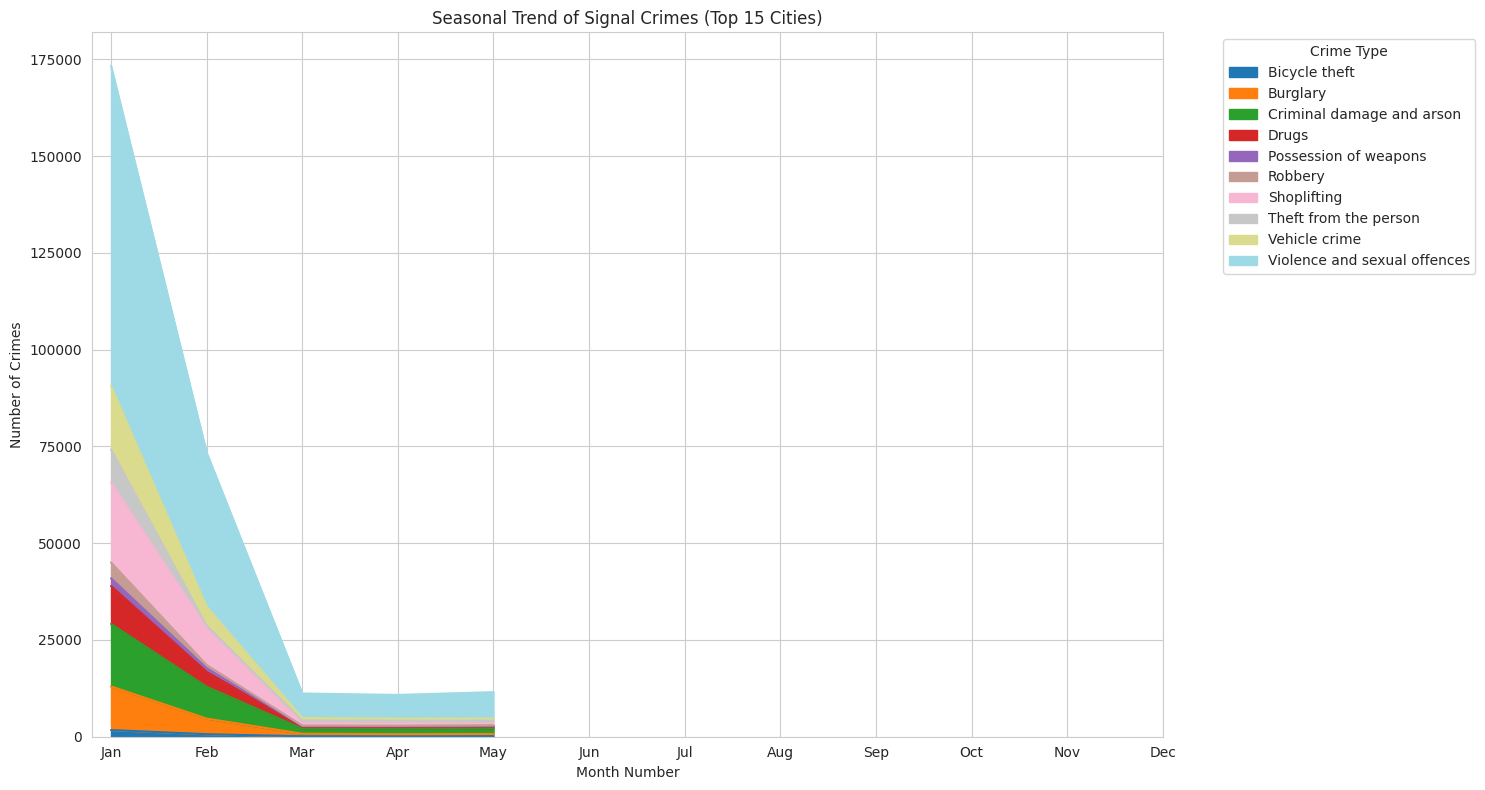

In [98]:
# --- 4. Stacked Area Plot (Seasonal Crime Focus) ---

# ใช้ DataFrame ที่กรองเฉพาะ Signal Crimes และ Top 15 Cities แล้ว
# Group by Month_num and Crime type and count occurrences
seasonal_crime = df_signal_top15.groupby(['Month_num', 'Crime type']).size().unstack(fill_value=0)

# Plotting the stacked area plot
seasonal_crime.plot(kind='area', stacked=True, figsize=(15, 8), colormap='tab20')
plt.title('Seasonal Trend of Signal Crimes (Top 15 Cities)')
plt.xlabel('Month Number')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

กราฟนี้แสดงให้เห็นแนวโน้มของจำนวนอาชญากรรมประเภทที่โจรสนใจ (Signal Crimes) ในแต่ละเดือน

ประโยชน์:

*   **ระบุช่วงเวลา "พีค":** ช่วยให้เห็นว่าอาชญากรรมประเภทใดมีแนวโน้มเพิ่มขึ้นหรือลดลงในช่วงเดือนใดบ้าง ทำให้รู้ว่าช่วงเวลาไหนที่ตำรวจอาจจะเพิ่มการตรวจตราเป็นพิเศษสำหรับอาชญากรรมบางประเภท
*   **วางแผนหลบหลีก:** โจรสามารถใช้ข้อมูลนี้เพื่อหลีกเลี่ยงพื้นที่หรือช่วงเวลาที่ตำรวจมีแนวโน้มจะโฟกัสไปที่อาชญากรรมที่ตนเองสนใจ
*   **เข้าใจรูปแบบการทำงานของตำรวจ:** ทำให้เห็นว่าตำรวจอาจมีแผนการทำงานที่แตกต่างกันไปในแต่ละฤดูกาล หรือแต่ละเดือน ขึ้นอยู่กับแนวโน้มของอาชญากรรมที่เกิดขึ้น

In [99]:
# Step 1 & 2: Filter for relevant outcomes and group by month and crime type

# Define outcomes indicating successful police action
successful_outcomes = [
    'Suspect charged',
    'Offender given a caution',
    'Offender given community resolution',
    'Suspect charged as part of another case',
    'Offender given penalty notice',
    'Offender given drugs possession warning'
]

# Filter the df_signal_top15 DataFrame for successful outcomes
df_successful_outcomes = df_signal_top15[df_signal_top15['Last outcome category'].isin(successful_outcomes)]

# Group by Month_num and Crime type and count occurrences
seasonal_successful_crime = df_successful_outcomes.groupby(['Month_num', 'Crime type']).size().unstack(fill_value=0)

# Display the grouped data
display(seasonal_successful_crime)

Crime type,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Possession of weapons,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Month_num,,,,,,,,,,
1,1,24,141,461,56,2,238,1,15,690
2,2,13,92,135,38,0,111,3,6,345
3,0,1,14,23,3,0,5,0,0,44
4,0,1,13,18,2,0,5,0,0,47
5,1,1,8,10,2,0,1,0,0,25


โค้ดนี้ใช้เพื่อเตรียมข้อมูลสำหรับกราฟที่แสดงให้เห็นว่า ในแต่ละเดือน มีอาชญากรรมประเภทไหนบ้างที่ตำรวจสามารถดำเนินการกับผู้กระทำผิดได้สำเร็จไปกี่ครั้ง

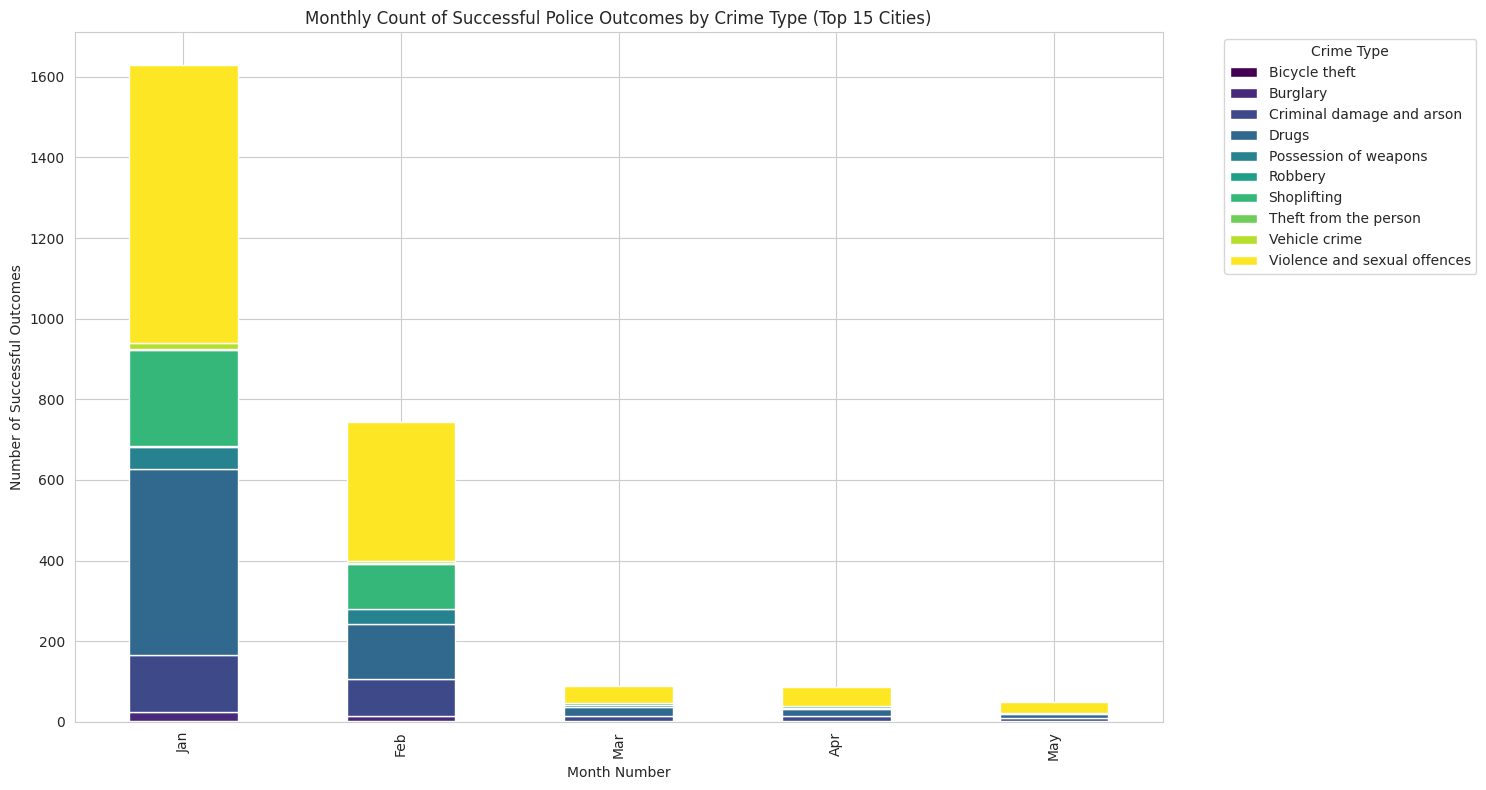

In [100]:
# Step 3: Visualize the trend

# Plotting the stacked bar chart
seasonal_successful_crime.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

plt.title('Monthly Count of Successful Police Outcomes by Crime Type (Top 15 Cities)')
plt.xlabel('Month Number')
plt.ylabel('Number of Successful Outcomes')
plt.xticks(range(0, 5), ['Jan', 'Feb', 'Mar', 'Apr', 'May']) # Adjust ticks based on available months
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

กราฟนี้แสดงให้เห็นว่าอาชญากรรมประเภทไหนที่ตำรวจมี "Successful Outcomes" สูงในเดือนไหนบ้าง ซึ่งหมายถึงว่าในเดือนและประเภทอาชญากรรมเหล่านั้น ตำรวจมีแนวโน้มที่จะจับกุมหรือดำเนินคดีได้สำเร็จสูง โจรอาจจะใช้ข้อมูลนี้เพื่อหลีกเลี่ยงการกระทำผิดในเดือนที่ประเภทอาชญากรรมที่ตนสนใจมี Successful Outcomes สูง

# Outcomes

เนื่องจากข้อมูลใหญ่เกินไปทำให้ต้องแยกเป็นลิ้งก์

https://colab.research.google.com/drive/1BtnwmLwk0YGPJyzYbTle09LV7P5x7-y9?usp=sharing

# โหลดลง Google Sheet

stopandsearch

In [ ]:
# TODO: Authenticate กับ Google
# Hint: ใช้ from google.colab import auth
#       auth.authenticate_user()
#       แล้ว authorize กับ gspread

# เขียนโค้ดที่นี่
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

print("✅ Google Authentication สำเร็จ")

In [ ]:
def upload_to_sheet(spreadsheet, df, sheet_name):
    """อัปโหลด DataFrame ไปยัง Google Sheet"""
    # TODO: เขียนโค้ดอัปโหลด
    # Hint: 1. หา/สร้าง worksheet
    #       2. ล้างข้อมูลเดิม (worksheet.clear())
    #       3. แปลง DataFrame เป็น list (ระวัง date objects!)
    #       4. อัปโหลด (worksheet.update())
    try:
        worksheet = spreadsheet.worksheet(sheet_name)
    except gspread.WorksheetNotFound:
        worksheet = spreadsheet.add_worksheet(title=sheet_name, rows="100", cols="20")

    # Clear existing data
    worksheet.clear()

    # Convert DataFrame to list of lists (including header)
    # Convert any date objects to string to avoid gspread errors
    data_to_upload = [df.columns.values.tolist()] + df.fillna('').astype(str).values.tolist()


    # Upload data
    worksheet.update(values=data_to_upload)
    print(f"✅ อัปโหลด '{sheet_name}' สำเร็จ")

# TODO: อัปโหลดทั้ง 5 warehouses
# เขียนโค้ดที่นี่
# Specify the title of your Google Sheet
spreadsheet_title = 'Stop and Search Data' # You can change this title

# Open the spreadsheet (create if it doesn't exist)
try:
    sh = gc.open(spreadsheet_title)
    print(f"✅ เปิด Spreadsheet '{spreadsheet_title}' สำเร็จ")
except gspread.SpreadsheetNotFound:
    sh = gc.create(spreadsheet_title)
    print(f"✅ สร้าง Spreadsheet '{spreadsheet_title}' สำเร็จ")

# Upload the stop and search data
upload_to_sheet(sh, combined_stopandsearch_files_df, 'Stop and Search Data')

print("\n✅ อัปโหลดข้อมูลทั้งหมดไปยัง Google Sheets สำเร็จ")

street

In [ ]:
#นำออกไฟล์เป็น csv
combined_street_df.to_excel('cleaned_street_df2.xlsx', index=False)

Outcomes

# Lookerstudio

https://lookerstudio.google.com/reporting/98a272cc-11e6-499d-9562-7b72f8920218
